# Prject(Group 6) Visualization and Exploratory data analysis

In [11]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Checking the dataframe and choosing features
First, we import the cleaned dataset. The whole dataset has 12 features as well as over 400,000 movie data.

In [4]:
imdb = pd.read_csv('imdb.csv')
imdb.head()

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,genres,primaryName
0,92759,tt0013274,nm0412842,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Nikolai Izvolov
1,92760,tt0013274,nm0895048,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Dziga Vertov
2,522892,tt0062336,nm0815612,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Rubén Sotoconil
3,522893,tt0062336,nm1860495,actress,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Claudia Paz
4,522894,tt0062336,nm0016013,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Luis Alarcón


In our program, ratings are the most important indicator of a film's popularity. So we can start by looking at the specific data of the ratings.

In [5]:
imdb.averageRating.describe()

count    404315.000000
mean          6.057180
std           1.522904
min           1.000000
25%           5.100000
50%           6.200000
75%           7.100000
max          10.000000
Name: averageRating, dtype: float64

In our data set, we can intuitively see that the average score is around 6.0 and the median is 6.5. And most scores are between 5.1 and 7.1. This will affect our next specific rating of the movie's popularity. For now, we will make the following scale of popularity: 
- Very Positive(>7.1)
- Mostly Positive(6.0-7.1)
- Mostly nagative(5.1-6.0)
- Very Nagative(<5.1)

Then, let's explore which factors are strongly correlated with the scores, which will greatly help our machine learning model to make predictions:

In [6]:
# Check how many factors our data set have
imdb.columns.values.tolist()

['Unnamed: 0',
 'tconst',
 'nconst',
 'category',
 'averageRating',
 'numVotes',
 'primaryTitle',
 'isAdult',
 'startYear',
 'runtimeMinutes',
 'genres',
 'primaryName']

It can be clearly observed that the first 3 factors are only the number of the movie or the actor/director. So we can exclude these 3 between them.It can be clearly observed that the first 3 factors are only the number of the movie or the actor/director. So we can exclude these 3 between. And averageRating, numVotes, isAdult, startYear and runtimeMinutes are very good quantifiable data. genres would also be one of the factors that could have a significant impact. So we will analyze these factors next.

First is the distribution of average rating

Text(0.5, 1.0, 'The distribution of  average rating')

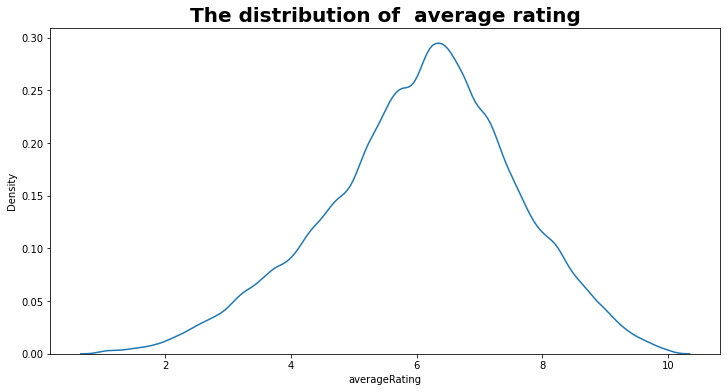

In [12]:
#评分的分布情况
plt.figure(figsize=(12, 6))
sns.kdeplot(imdb['averageRating'])
plt.title('The distribution of  average rating', fontsize=20, weight='bold', color='black')

## The relationship of ratings and other element


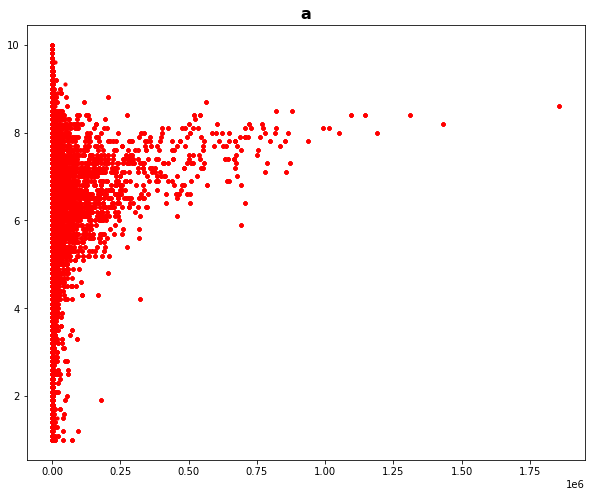

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(imdb['numVotes'], imdb['averageRating'], s=10, c='red')
plt.title('a', fontsize=16, weight='bold')
plt.show()

Regarding the relationship between the number of votes and the ratings, the scatterplot presents an uncorrelated feature. However, we can observe that a large number of votes occurs around a rating of 8.0. This means that good movies are more likely to receive a large number of ratings. But the number of votes is statistically uncorrelated for ratings.

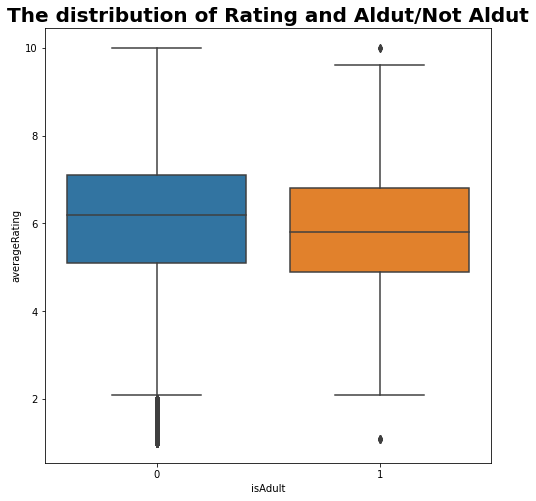

In [36]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="isAdult", y="averageRating", data=imdb, linewidth=1.5)
plt.title('The distribution of Rating and Aldut/Not Aldut',fontsize=20, weight='bold')
plt.show()

boxplot shows that whether a movie is adult-rated or not makes little difference in terms of rating, so you can ignore the effect of this factor.

<Axes: title={'center': 'The distribution of film release year'}>

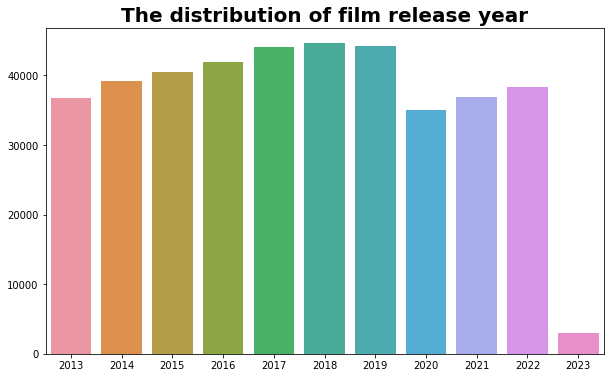

In [191]:
#每一年电影发布数量分布
df = imdb.startYear.value_counts()
x = [i for i in df.keys()]
y = []
for i in range(0,11):
    y.append(df.values[i])
plt.figure(figsize=(10, 6))
plt.title('The distribution of film release year', fontsize=20, weight='bold')
sns.barplot(x=x, y=y)

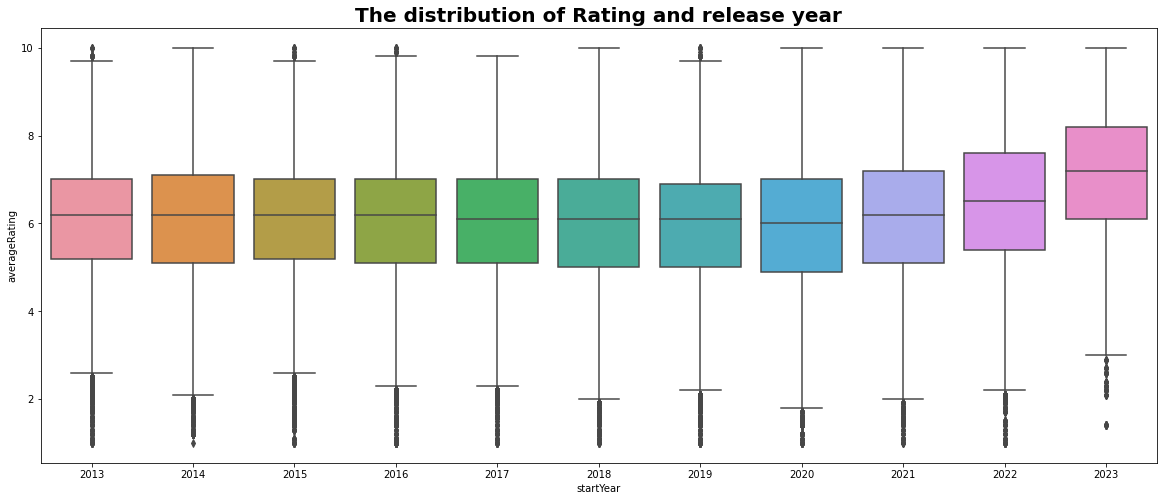

In [192]:
#每一年电影评分分布情况
plt.figure(figsize=(20, 8))
sns.boxplot(x="startYear", y="averageRating", data=imdb, linewidth=1.5)
plt.title('The distribution of Rating and release year',fontsize=20, weight='bold')
plt.show()

We can see that people generally have better ratings for new movies released after 2021. Despite the huge impact of the pandemic on the movie industry in 2020 resulting in a drop in the number of releases, we still have 35,000 data per year(except 2023), so it is still a valid conclusion that the newer the movie, the more likely it is to receive a high rating.

In [196]:
#这里我把genres里面有好几种类型的全部拆出来了
#比如一个电影有2种genres，占一行。我把原来单独的一行拆成两行，genres拆出来后分别标在2行的最后。所以左下角显示有70w数据，原来只有40w。
df1 = imdb
df1 = df1.drop(['genres'], axis=1).join(df1['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df1

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,primaryName,genres
0,92759,tt0013274,nm0412842,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Nikolai Izvolov,Documentary
1,92760,tt0013274,nm0895048,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Dziga Vertov,Documentary
2,522892,tt0062336,nm0815612,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Rubén Sotoconil,Drama
3,522893,tt0062336,nm1860495,actress,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Claudia Paz,Drama
4,522894,tt0062336,nm0016013,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Luis Alarcón,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
404310,54610727,tt9916730,nm6096005,actor,8.3,10,6 Gunn,0,2017,116,Devadhar Archit,\N
404311,54610728,tt9916730,nm0059461,actor,8.3,10,6 Gunn,0,2017,116,Sunil Barve,\N
404312,54610729,tt9916730,nm13233318,actor,8.3,10,6 Gunn,0,2017,116,Ganesh Vasant Patil,\N
404313,54610730,tt9916730,nm4852679,actor,8.3,10,6 Gunn,0,2017,116,Bhushan Pradhan,\N


<Axes: title={'center': 'The distribution of genres'}>

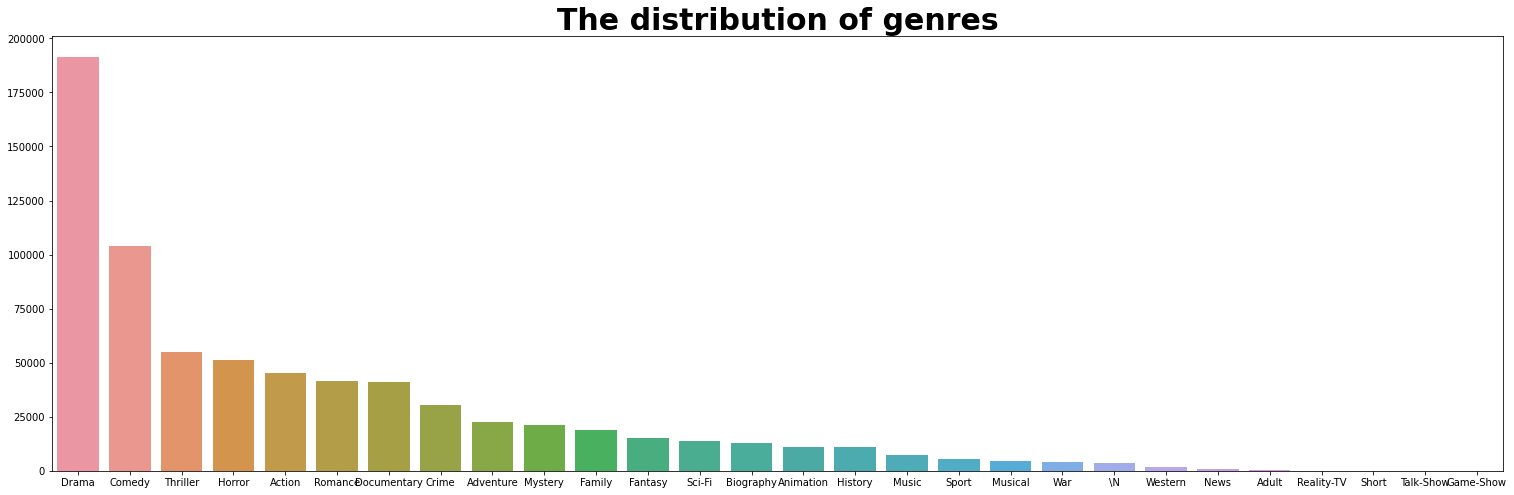

In [235]:
#然后就是电影类型的分布情况。
df2 = df1.genres.value_counts()
x = [i for i in df2.keys()]
y = []
for i in range(0,28):
    y.append(df2.values[i])
plt.figure(figsize=(26, 8))
plt.title('The distribution of genres', fontsize=30, weight='bold')
sns.barplot(x=x, y=y)

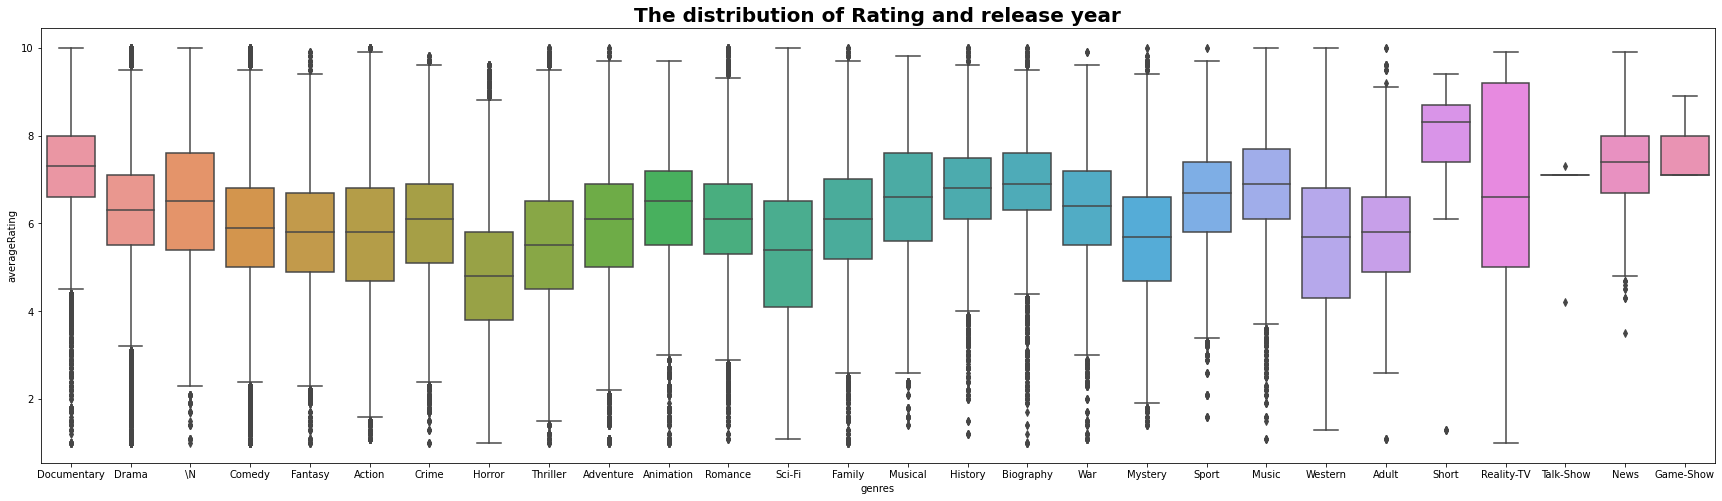

In [238]:
#评分和电影类型的关系
plt.figure(figsize=(30, 8))
sns.boxplot(x="genres", y="averageRating", data=df1, linewidth=1.5)
plt.title('The distribution of Rating and genres',fontsize=20, weight='bold')
plt.show()

Here, we can see that Horror, Sci-Fi, Mystery and Western movies are less likely to get high ratings. While Documentary, Drama, Crime, Animation, Musical, History, Biography titles are most likely to get high ratings (except for some genres with too small a sample size).

## Summary and future work

Based on the above analysis, we will make movie rating predictions mainly for genres and release years. In the next work, we will use multiple linear regression models, decision tree regression models, random forest regression models, etc. to predict movie ratings.